In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image
from ultralytics import YOLO
import random

## テストデータの推論

In [3]:
# テストデータへのpathのリストを取得
data_dir = "data"
image_paths = [os.path.join(data_dir, 'testing_images', filename) for filename in os.listdir(os.path.join(data_dir, 'testing_images')) if filename.endswith(".jpg")]

In [5]:
# bestなモデルの読み込み
best_model = YOLO("runs/detect/train2/weights/best.pt")

In [6]:
# 推論
results = best_model(image_paths)


0: 256x416 (no detections), 3.7ms
1: 256x416 (no detections), 3.7ms
2: 256x416 (no detections), 3.7ms
3: 256x416 (no detections), 3.7ms
4: 256x416 (no detections), 3.7ms
5: 256x416 (no detections), 3.7ms
6: 256x416 (no detections), 3.7ms
7: 256x416 (no detections), 3.7ms
8: 256x416 (no detections), 3.7ms
9: 256x416 (no detections), 3.7ms
10: 256x416 (no detections), 3.7ms
11: 256x416 (no detections), 3.7ms
12: 256x416 1 car, 3.7ms
13: 256x416 1 car, 3.7ms
14: 256x416 2 cars, 3.7ms
15: 256x416 1 car, 3.7ms
16: 256x416 3 cars, 3.7ms
17: 256x416 1 car, 3.7ms
18: 256x416 4 cars, 3.7ms
19: 256x416 2 cars, 3.7ms
20: 256x416 3 cars, 3.7ms
21: 256x416 3 cars, 3.7ms
22: 256x416 3 cars, 3.7ms
23: 256x416 2 cars, 3.7ms
24: 256x416 3 cars, 3.7ms
25: 256x416 2 cars, 3.7ms
26: 256x416 1 car, 3.7ms
27: 256x416 1 car, 3.7ms
28: 256x416 1 car, 3.7ms
29: 256x416 3 cars, 3.7ms
30: 256x416 2 cars, 3.7ms
31: 256x416 2 cars, 3.7ms
32: 256x416 1 car, 3.7ms
33: 256x416 (no detections), 3.7ms
34: 256x416 1 ca

In [11]:
# Visualize the results
for i, r in enumerate(results[:5]):
    # Plot results image (assuming plot() returns BGR-order NumPy array)
    im_bgr = r.plot()

    # Convert to RGB for display (if necessary)
    # im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

    # Show results (consider environment and preference)
    cv2.imshow(f"Detection {i}", im_bgr)  # Using OpenCV for consistent display
    cv2.waitKey(0)  # Wait for key press to close window
    cv2.destroyAllWindows()

    # Optionally, save the image (uncomment if desired)
    # cv2.imwrite(f"detection_{i}.jpg", im_rgb)

In [7]:
# テストデータの保存先
os.makedirs("./inference_test", exist_ok=True)

In [8]:
# 保存
for i, r in enumerate(results):
    img = r.plot()
    cv2.imwrite(f"./inference_test/detection_{i}.jpg", img)

## テストデータ推論結果の描画

In [9]:
# 再度同じシード値で乱数を生成
random.seed(1)
# bboxを描画した画像が保存されたdirへのpath
path = "inference_test"

# ランダムな9枚のbboxを描画した画像の相対pathのリスト
image_list = []

# フォルダ内のすべてのファイル名を取得
filenames = os.listdir(path)

# ランダムに 16枚の画像を選択
for _ in range(16):
    random_filename = random.choice(filenames)
    image_list.append(os.path.join(path, random_filename))

print(image_list)

['inference_test\\detection_129.jpg', 'inference_test\\detection_72.jpg', 'inference_test\\detection_112.jpg', 'inference_test\\detection_157.jpg', 'inference_test\\detection_125.jpg', 'inference_test\\detection_55.jpg', 'inference_test\\detection_45.jpg', 'inference_test\\detection_5.jpg', 'inference_test\\detection_91.jpg', 'inference_test\\detection_29.jpg', 'inference_test\\detection_146.jpg', 'inference_test\\detection_12.jpg', 'inference_test\\detection_53.jpg', 'inference_test\\detection_104.jpg', 'inference_test\\detection_30.jpg', 'inference_test\\detection_40.jpg']


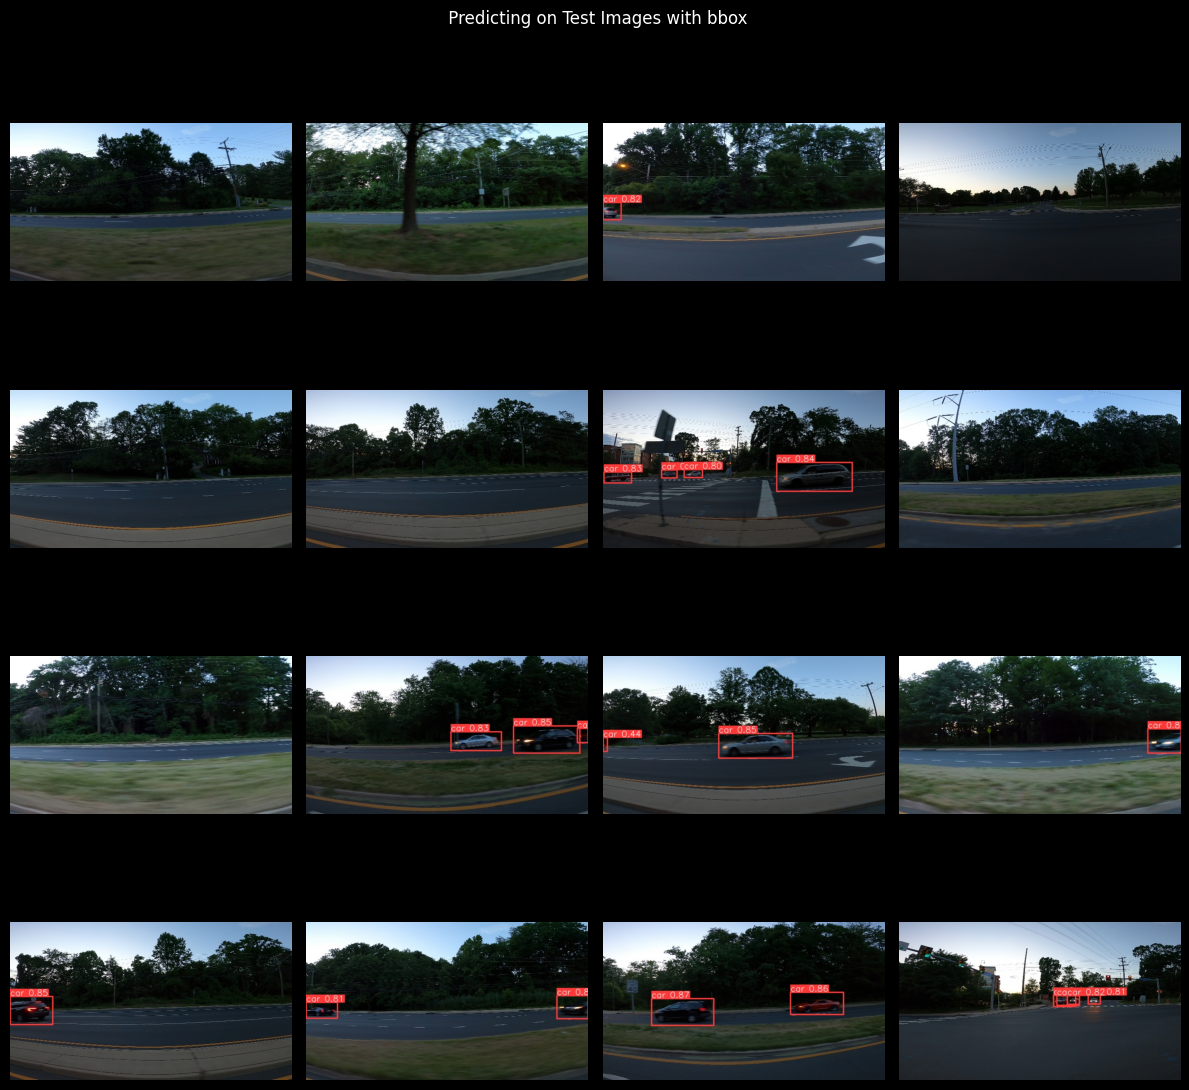

In [10]:
plt.style.use("dark_background")
# 3x3のサブプロットを作成
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# 各画像を読み込んで描画
for i, image_path in enumerate(image_list):
    row = i // 4  # 行番号を取得
    col = i % 4  # 列番号を取得
    image = plt.imread(image_path)
    axes[row, col].imshow(image)

# タイトルと軸ラベルを設定
fig.suptitle(" Predicting on Test Images with bbox")
for ax in axes.flat:
    ax.axis('off')  # 軸ラベルと目盛線を非表示

# グラフを表示
plt.tight_layout()  # サブプロット間の余白を調整
plt.show()

## 動画データの推論

In [34]:
# video_path = "movie/sample.mp4"
# cap = cv2.VideoCapture(video_path)

In [35]:
# # Loop through the video frames
# while cap.isOpened():
#     # Read a frame from the video
#     success, frame = cap.read()
#     if success == False:
#         break

#     elif success:
#         # Run YOLOv8 inference on the frame
#         results = best_model(frame)

#         # Visualize the results on the frame
#         annotated_frame = results[0].plot()

#         # Display the annotated frame
#         cv2.imshow("YOLOv8 Inference", annotated_frame)
#     # 動画の再生中にescを押されると動画が止まるように設定(27はescに対応)
#     if cv2.waitKey(30) == 27:
#         break
# cv2.destroyAllWindows()
# # メモリの解放
# cap.release()


0: 256x416 1 Crab, 196.0ms
Speed: 4.0ms preprocess, 196.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 222.0ms
Speed: 2.0ms preprocess, 222.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.9ms
Speed: 1.1ms preprocess, 14.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 0.0ms postprocess per image at shape (1,

In [39]:
# # 動画ファイルのパス
# video_path = "movie/sample.mp4"

# # 動画キャプチャオブジェクトを作成
# cap = cv2.VideoCapture(video_path)

# # 動画書き込み用のWriterオブジェクトを作成
# fourcc = cv2.VideoWriter_fourcc(*'XVID')  # 動画コーデックを指定
# output_path = "movie/sample_inference.mp4"  # 出力動画ファイルのパス
# writer = cv2.VideoWriter(output_path, fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# while cap.isOpened():
#     # フレームを取得
#     success, frame = cap.read()
#     if not success:
#         break

#     # YOLOv8推論を実行
#     results = best_model(frame)

#     # 推論結果と元のフレームを結合して新しいフレームを作成
#     annotated_frame = results[0].plot()
#     annotated_frame = cv2.addWeighted(frame, 0.5, annotated_frame, 0.5, 0.0)
#     # 表示
#     cv2.imshow("YOLOv8 Inference", annotated_frame)

#     # 新しいフレームを動画ファイルに書き込む
#     writer.write(annotated_frame)

#     # 動画の再生中にEscキーを押すとループを抜ける
#     if cv2.waitKey(1) & 0xFF == 27:
#         break

# # メモリ開放
# cap.release()
# writer.release()
# cv2.destroyAllWindows()

0: 256x416 1 Crab, 169.0ms
Speed: 3.0ms preprocess, 169.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 131.0ms
Speed: 2.0ms preprocess, 131.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.0ms
Speed: 1.5ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 13.2ms
Speed: 1.0ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Crab, 14.0ms
Speed: 0.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 12.1ms
Speed: 1.0ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 

In [40]:
# # 動画ファイルのパス
# video_path = "movie/sample2.mp4"

# # 動画キャプチャオブジェクトを作成
# cap = cv2.VideoCapture(video_path)

# # 動画書き込み用のWriterオブジェクトを作成
# fourcc = cv2.VideoWriter_fourcc(*'XVID')  # 動画コーデックを指定
# output_path = "movie/sample2_inference.mp4"  # 出力動画ファイルのパス
# writer = cv2.VideoWriter(output_path, fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# while cap.isOpened():
#     # フレームを取得
#     success, frame = cap.read()
#     if not success:
#         break

#     # YOLOv8推論を実行
#     results = best_model(frame)

#     # 推論結果と元のフレームを結合して新しいフレームを作成
#     annotated_frame = results[0].plot()
#     annotated_frame = cv2.addWeighted(frame, 0.5, annotated_frame, 0.5, 0.0)
#     # 表示
#     cv2.imshow("YOLOv8 Inference", annotated_frame)

#     # 新しいフレームを動画ファイルに書き込む
#     writer.write(annotated_frame)

#     # 動画の再生中にEscキーを押すとループを抜ける
#     if cv2.waitKey(1) & 0xFF == 27:
#         break

# # メモリ開放
# cap.release()
# writer.release()
# cv2.destroyAllWindows()


0: 256x416 1 Shrimp, 193.5ms
Speed: 3.0ms preprocess, 193.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.6ms
Speed: 1.0ms preprocess, 14.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 Shrimp, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 